In [1]:
%matplotlib inline

from sklearn import datasets
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import scale

import sklearn
print sklearn.__version__

0.17.1


In [2]:
boston = datasets.load_boston()
y=boston.target
x=boston.data

In [3]:
dir(boston)

['__class__',
 '__cmp__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'clear',
 'copy',
 'fromkeys',
 'get',
 'has_key',
 'items',
 'iteritems',
 'iterkeys',
 'itervalues',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values',
 'viewitems',
 'viewkeys',
 'viewvalues']

In [4]:
''.join(dir(boston))

'__class____cmp____contains____delattr____delitem____dict____doc____eq____format____ge____getattr____getattribute____getitem____gt____hash____init____iter____le____len____lt____module____ne____new____reduce____reduce_ex____repr____setattr____setitem____setstate____sizeof____str____subclasshook____weakref__clearcopyfromkeysgethas_keyitemsiteritemsiterkeysitervalueskeyspoppopitemsetdefaultupdatevaluesviewitemsviewkeysviewvalues'

In [5]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='|S7')

In [6]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [8]:
results=smf.ols('boston.target ~ boston.data', data=boston).fit()
print results.summary()

                            OLS Regression Results                            
Dep. Variable:          boston.target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 18 May 2016   Prob (F-statistic):          6.95e-135
Time:                        21:23:18   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          36.4911      5.104     

# 线性回归 

In [12]:
regr = linear_model.LinearRegression()
lm=regr.fit(boston.data,y)

In [13]:
lm.intercept_,lm.coef_,lm.score(boston.data,y)

(36.491103280361926,
 array([ -1.07170557e-01,   4.63952195e-02,   2.08602395e-02,
          2.68856140e+00,  -1.77957587e+01,   3.80475246e+00,
          7.51061703e-04,  -1.47575880e+00,   3.05655038e-01,
         -1.23293463e-02,  -9.53463555e-01,   9.39251272e-03,
         -5.25466633e-01]),
 0.74060774286494269)

In [14]:
predicted = regr.predict(boston.data)

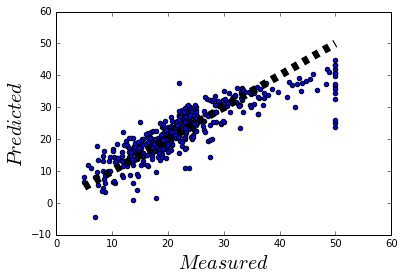

In [19]:

fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=8)
ax.set_xlabel('$Measured$', fontsize = 20)
ax.set_ylabel('$Predicted$', fontsize = 20)
plt.show()

In [20]:
from sklearn.cross_validation import train_test_split
Xs_train, Xs_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=42)


In [26]:
regr = linear_model.LinearRegression()
lm=regr.fit(Xs_train, y_train)

In [27]:
lm.intercept_, lm.coef_, lm.score(Xs_train, y_train)

(30.288948339368503,
 array([ -1.12463481e-01,   3.00810168e-02,   4.07309919e-02,
          2.78676719e+00,  -1.72406347e+01,   4.43248784e+00,
         -6.23998173e-03,  -1.44848504e+00,   2.62113793e-01,
         -1.06390978e-02,  -9.16398679e-01,   1.24516469e-02,
         -5.09349120e-01]),
 0.75088377867329148)

In [28]:
predicted=regr.predict(Xs_test)

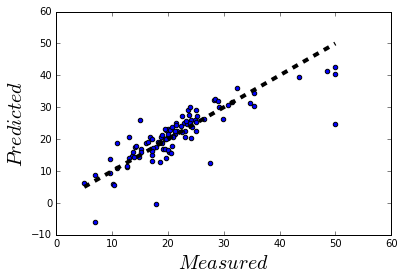

In [29]:
fig, ax =plt.subplots()
ax.scatter(y_test,predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('$Measured$', fontsize = 20)
ax.set_ylabel('$Predicted$', fontsize = 20)
plt.show()

In [30]:
from sklearn.cross_validation import cross_val_score

regr = linear_model.LinearRegression()
scores = cross_val_score(regr, boston.data , boston.target, cv = 3)
scores.mean()  

-1.5787701857180616

In [31]:
from sklearn.cross_validation import cross_val_score

regr = linear_model.LinearRegression()
scores = cross_val_score(regr, boston.data , boston.target, cv = 7)
scores.mean()  

0.45384871359695772

In [32]:
from sklearn.cross_validation import cross_val_score

regr = linear_model.LinearRegression()
scores = cross_val_score(regr, boston.data , boston.target, cv = 50)
scores.mean()  

-0.71944139994484468

In [34]:
scores = [cross_val_score(regr, data_X_scale, boston.target, cv = int(i)).mean() for i in range(3, 50)]###?!
plt.plot(range(3, 50), scores,'r-o')
plt.show()

NameError: name 'data_X_scale' is not defined

In [38]:
import pandas as pd

df = pd.read_csv('/Users/lisa/Desktop/tianya_bbs_threads_list.txt', sep = "\t", header=None)
df=df.rename(columns = {0:'title', 1:'link', 2:'author',3:'author_page', 4:'click', 5:'reply', 6:'time'})
df[:2]

,title,link,author,author_page,click,reply,time
0,【民间语文第161期】宁波px启示:船进港湾人应上岸,/post-free-2849477-1.shtml,贾也,http://www.tianya.cn/50499450,194699,2703,2012-10-29 07:59
1,宁波镇海PX项目引发群体上访 当地政府发布说明(转载),/post-free-2839539-1.shtml,无上卫士ABC,http://www.tianya.cn/74341835,88254,1041,2012-10-24 12:41


In [39]:
def randomSplit(dataX, dataY, num):
    dataX_train = []
    dataX_test = []
    dataY_train = []
    dataY_test = []
    import random
    test_index = random.sample(range(len(df)), num)
    for k in range(len(dataX)):
        if k in test_index:
            dataX_test.append([dataX[k]])
            dataY_test.append(dataY[k])
        else:
            dataX_train.append([dataX[k]])
            dataY_train.append(dataY[k])
    return dataX_train, dataX_test, dataY_train, dataY_test, 

In [40]:
import numpy as np
data_X=df.reply
data_X_train, data_X_test,data_y_train,data_y_test = randomSplit(np.log(df.click+1), np.log(df.reply+1), 20)
regr = linear_model.LinearRegression()
regr.fit(data_X_train, data_y_train)
print'Variance score: %.2f' % regr.score(data_X_test, data_y_test)

Variance score: 0.57


In [41]:
y_true, y_pred = data_y_test, regr.predict(data_X_test)

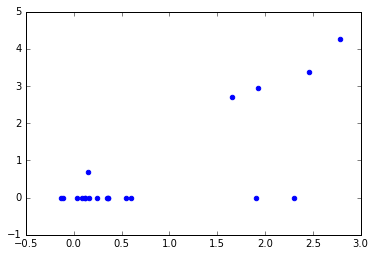

In [42]:
plt.scatter(y_pred, y_true,  color='blue')
plt.show()

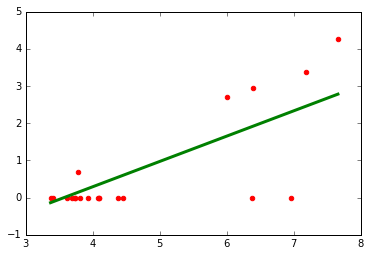

In [43]:
plt.scatter(data_X_test, data_y_test,  color='red')
plt.plot(data_X_test, regr.predict(data_X_test), color='green', linewidth=3)
plt.show()

In [44]:
print 'Coefficients: \n', regr.coef_

Coefficients: 
[ 0.6798967]


In [45]:
print "Residual sum of squares: %.2f" % np.mean((regr.predict(data_X_test) - data_y_test) ** 2)

Residual sum of squares: 0.78


In [46]:
df.click_log = [[df.click[i]] for i in range(len(df))]
df.reply_log = [[df.reply[i]] for i in range(len(df))]

In [47]:
from sklearn.cross_validation import train_test_split
Xs_train, Xs_test, y_train, y_test = train_test_split(df.click_log, df.reply_log,test_size=0.2, random_state=0)
regr = linear_model.LinearRegression()
regr.fit(Xs_train, y_train)
print'Variance score: %.2f' % regr.score(Xs_test, y_test)

Variance score: 0.95


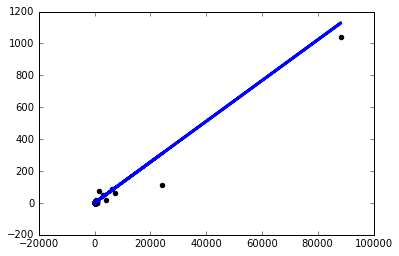

In [48]:
plt.scatter(Xs_test, y_test,  color='black')
plt.plot(Xs_test, regr.predict(Xs_test), color='blue', linewidth=3)
plt.show()

In [49]:
from sklearn.cross_validation import cross_val_score

regr = linear_model.LinearRegression()
scores = cross_val_score(regr, df.click_log, df.reply_log, cv = 3)
scores.mean()  

0.19543073670335045

In [50]:
regr = linear_model.LinearRegression()
scores = cross_val_score(regr, df.click_log, df.reply_log, cv = 7)
scores.mean()  

-0.20903368481834045

In [52]:
regr = linear_model.LinearRegression()
scores = cross_val_score(regr, df.click_log, df.reply_log, cv = 6)
scores.mean()  

-0.0098102359341696119

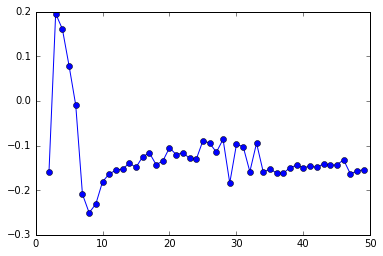

In [56]:
scores = [cross_val_score(regr, df.click_log, df.reply_log, cv = int(i)).mean() for i in range(2, 50)]###?!为什么这里run得出来？
plt.plot(range(2, 50), scores,'b-o')
plt.show()

# 逻辑回归

In [57]:
repost = []
for i in df.title:
    if u'转载' in i.decode('utf8'):
        repost.append(1)
    else:
        repost.append(0)

In [60]:
data_X = [[df.click[i], df.reply[i]] for i in range(len(df))]
data_X[:10]

[[194699, 2703],
 [88254, 1041],
 [82888, 625],
 [45306, 219],
 [38161, 835],
 [27047, 122],
 [24217, 115],
 [21503, 378],
 [15396, 375],
 [8520, 41]]

In [61]:
from sklearn.linear_model import LogisticRegression
df['repost'] = repost
model = LogisticRegression()
model.fit(data_X,df.repost)
model.score(data_X,df.repost)

0.61324786324786329

In [62]:
def randomSplitLogistic(dataX, dataY, num):
    dataX_train = []
    dataX_test = []
    dataY_train = []
    dataY_test = []
    import random
    test_index = random.sample(range(len(df)), num)
    for k in range(len(dataX)):
        if k in test_index:
            dataX_test.append(dataX[k])
            dataY_test.append(dataY[k])
        else:
            dataX_train.append(dataX[k])
            dataY_train.append(dataY[k])
    return dataX_train, dataX_test, dataY_train, dataY_test, 

In [63]:
data_X_train, data_X_test, data_y_train, data_y_test = randomSplitLogistic(data_X, df.repost, 20)
log_regr = LogisticRegression()
log_regr.fit(data_X_train, data_y_train)
print'Variance score: %.2f' % log_regr.score(data_X_test, data_y_test)

Variance score: 0.65


In [64]:
y_true, y_pred = data_y_test, log_regr.predict(data_X_test)

In [65]:
y_true, y_pred

([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1],
 array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

In [66]:
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         5
          1       0.72      0.87      0.79        15

avg / total       0.54      0.65      0.59        20



In [67]:
from sklearn.cross_validation import train_test_split
Xs_train, Xs_test, y_train, y_test = train_test_split(data_X, df.repost, test_size=0.6, random_state=42)

In [68]:
log_regr = LogisticRegression()
log_regr.fit(Xs_train, y_train)
print'Variance score: %.2f' % log_regr.score(Xs_test, y_test)

Variance score: 0.60


In [69]:
print('Logistic score for test set: %f' % log_regr.score(Xs_test, y_test))
print('Logistic score for training set: %f' % log_regr.score(Xs_train, y_train))
y_true, y_pred = y_test, log_regr.predict(Xs_test)
print(classification_report(y_true, y_pred))

Logistic score for test set: 0.597865
Logistic score for training set: 0.609626
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       113
          1       0.60      1.00      0.75       168

avg / total       0.36      0.60      0.45       281



//anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [70]:
logre = LogisticRegression()
scores = cross_val_score(logre, data_X, df.repost, cv = 3)
scores.mean()  

0.53418803418803418

In [71]:
logre = LogisticRegression()
scores = cross_val_score(logre, data_X, df.repost, cv = 4)
scores.mean()  

0.55172413793103448

In [72]:
logre = LogisticRegression()
scores = cross_val_score(logre, data_X, df.repost, cv = 8)
scores.mean()  

0.57758620689655171

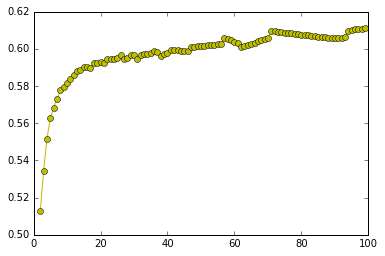

In [74]:
scores = [cross_val_score(logre, data_X, df.repost, cv = int(i)).mean() for i in range(2, 100)]###逻辑回归做分组有没有意义？
plt.plot(range(2, 100), scores,'y-o')
plt.show()

# 贝叶斯预测

In [75]:
from sklearn import naive_bayes
'  '.join(dir(naive_bayes))

'ABCMeta  BaseDiscreteNB  BaseEstimator  BaseNB  BernoulliNB  ClassifierMixin  GaussianNB  LabelBinarizer  MultinomialNB  __all__  __builtins__  __doc__  __file__  __name__  __package__  _check_partial_fit_first_call  abstractmethod  binarize  check_X_y  check_array  check_is_fitted  in1d  issparse  label_binarize  logsumexp  np  safe_sparse_dot  six'

In [76]:
from sklearn.naive_bayes import GaussianNB
import numpy as np
x= np.array([[-3,7],[1,5], [1,2], [-2,0], [2,3], [-4,0], [-1,1], [1,1], [-2,2], [2,7], [-4,1], [-2,7]])  #随机输入的？
Y = np.array([3, 3, 3, 3, 4, 3, 3, 4, 3, 4, 4, 4])

In [77]:
model = GaussianNB()
model.fit(x[:8], Y[:8])
predicted= model.predict([[1,2],[3,4]])
print predicted

[4 3]


In [78]:
model.score(x[8:], Y[8:])

0.25

# 决策树

In [79]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='gini')  #其他的criterion是啥？

In [80]:
data_X_train, data_X_test, data_y_train, data_y_test = randomSplitLogistic(data_X, df.repost, 20)
model.fit(data_X_train,data_y_train)
model.score(data_X_train,data_y_train)

0.9174107142857143

In [81]:
model.predict(data_X_test)

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1])

In [82]:
scores = cross_val_score(model, data_X, df.repost, cv = 3)
scores.mean()   

0.34615384615384609

# SVM向量机

In [83]:
from sklearn import svm
model=svm.SVC() 

In [84]:
''.join(dir(svm))

'LinearSVCLinearSVRNuSVCNuSVROneClassSVMSVCSVR__all____builtins____doc____file____name____package____path__baseboundsclassesl1_min_cliblinearlibsvmlibsvm_sparse'

In [85]:
data_X_train, data_X_test, data_y_train, data_y_test = randomSplitLogistic(data_X, df.repost, 20)
model.fit(data_X_train,data_y_train)
model.score(data_X_train,data_y_train)

0.8973214285714286

In [86]:
model.predict(data_X_test)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [87]:
scores = []
cvs = [3, 5, 10, 25, 50, 75, 100]
for i in cvs:
    score = cross_val_score(model, data_X, df.repost, cv = i)
    scores.append(score.mean() ) 

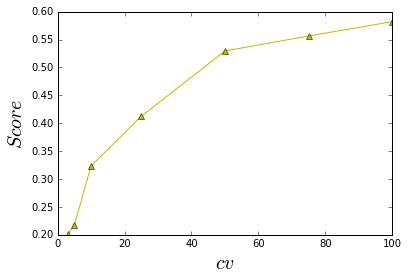

In [88]:
plt.plot(cvs, scores, 'y-^')
plt.xlabel('$cv$', fontsize = 20)
plt.ylabel('$Score$', fontsize = 20)
plt.show()

# Titanic Data

In [89]:
import numpy as np
from sklearn import tree

In [90]:
import pandas as pd
train = pd.read_csv('/Users/lisa/cjc2016/data/tatanic_train.csv', sep = ",")

In [91]:
train.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [92]:
train["Age"] = train["Age"].fillna(train["Age"].median())
train["Sex"][train["Sex"] == "male"] = 0
train["Sex"][train["Sex"] == "female"] = 1

train["Embarked"] = train["Embarked"].fillna('S')

train["Embarked"][train["Embarked"] == "S"] = 0
train["Embarked"][train["Embarked"] == "C"] = 1
train["Embarked"][train["Embarked"] == "Q"] = 2

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is t

In [93]:
target = train['Survived'].values
features_one = train[["Pclass", "Sex", "Age", "Fare"]].values

my_tree_one = tree.DecisionTreeClassifier()

my_tree_one = my_tree_one.fit(features_one, target)
print(my_tree_one.feature_importances_)
print(my_tree_one.score(features_one, target))

[ 0.12063997  0.31274009  0.23434721  0.33227273]
0.977553310887


In [94]:
test = pd.read_csv('/Users/lisa/cjc2016/data/tatanic_test.csv', sep = ",")
test.Fare[152] = test.Fare.median()
test["Age"] = test["Age"].fillna(test["Age"].median())
test["Sex"][test["Sex"] == "male"] = 0
test["Sex"][test["Sex"] == "female"] = 1

test["Embarked"] = test["Embarked"].fillna('S')
test["Embarked"][test["Embarked"] == "S"] = 0
test["Embarked"][test["Embarked"] == "C"] = 1
test["Embarked"][test["Embarked"] == "Q"] = 2

test_features = test[["Pclass","Sex", "Age", "Fare"]].values

my_prediction = my_tree_one.predict(test_features)

PassengerId =np.array(test['PassengerId']).astype(int)
my_solution = pd.DataFrame(my_prediction, PassengerId, columns = ["Survived"])



/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [96]:
print my_solution[:10]

     Survived
892         0
893         0
894         1
895         1
896         1
897         0
898         0
899         0
900         1
901         0


In [97]:
print my_solution.shape

(418, 1)


In [99]:
my_solution.to_csv("/Users/lisa/Desktop/tatanic_solution_one.csv", index_label = ["PassengerId"])

In [101]:
features_two = train[["Pclass","Age","Sex","Fare", "SibSp", "Parch", "Embarked"]].values


max_depth = 8  
min_samples_split = 6
my_tree_two = tree.DecisionTreeClassifier(max_depth = max_depth, min_samples_split = min_samples_split, random_state = 1)
my_tree_two = my_tree_two.fit(features_two, target)

print(my_tree_two.score(features_two, target))

0.884399551066


In [102]:
train_two = train
train_two['family_size'] = train.SibSp + train.Parch + 1

features_three = train[["Pclass", "Sex", "Age", "Fare", "SibSp", "Parch", "family_size"]].values

my_tree_three = tree.DecisionTreeClassifier()
my_tree_three = my_tree_three.fit(features_three, target)

print(my_tree_three.score(features_three, target))


0.979797979798


In [104]:
train_two = train
train_two['family_size'] = train.SibSp + train.Parch + 1

features_three = train[["Pclass", "Sex", "Age", "Fare", "SibSp", "Parch", "family_size"]].values

#控制过拟合！与上区别
max_depth = 8  
min_samples_split = 6
my_tree_three = tree.DecisionTreeClassifier(max_depth = max_depth, min_samples_split = min_samples_split, random_state = 1)
my_tree_three = my_tree_three.fit(features_three, target)

print(my_tree_three.score(features_three, target))



0.881032547699


In [106]:
from sklearn.ensemble import RandomForestClassifier
features_forest = train[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]].values

n_estimators = 100
forest = RandomForestClassifier(max_depth = 10, min_samples_split=2, n_estimators = n_estimators, random_state = 1)
my_forest = forest.fit(features_forest, target)

print(my_forest.score(features_forest, target))

test_features = test[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]].values
pred_forest = my_forest.predict(test_features)
print(len(test_features))
print(pred_forest[:120])

0.939393939394
418
[0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 0 0
 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1]


In [107]:
print(my_tree_two.feature_importances_) 
print(my_forest.feature_importances_)

print(my_tree_two.score(features_two, target))
print(my_forest.score(features_two, target))

[ 0.15879054  0.13327929  0.46767326  0.16159689  0.05465371  0.00776985
  0.01623646]
[ 0.10384741  0.20139027  0.31989322  0.24602858  0.05272693  0.04159232
  0.03452128]
0.884399551066
0.939393939394
